In [4]:
! pip install pip --upgrade

In [5]:
from warnings import filterwarnings
filterwarnings("ignore")

In [6]:
import pandas as pd
df =  pd.read_csv("Cars93.csv")
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [7]:
df.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             56 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

#### check for missing value

In [9]:
s=df.isna().sum()
s

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags               37
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [10]:
s[s>0]

AirBags           37
Rear.seat.room     2
Luggage.room      11
dtype: int64

### seperate catagorical and continues features

In [11]:
cat = list(df.columns[df.dtypes=="object"])
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [12]:
con = list(df.columns[df.dtypes!="object"])
con

['id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

### replace missing values

In [13]:
s[s>0]

AirBags           37
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [14]:
import sys
sys.path.append("C:/work/Arvind/PythonStudy/vscode/repository/Data_Preprocessing/")

In [15]:
import catconseperate

In [16]:
cat,con=catconseperate.catconsep(df)

In [17]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [18]:
con

['id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

### Replacing the missing value in dataframe

In [19]:
s[s>0]

AirBags           37
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [20]:
catconseperate.replacer(df)

Missing Values replaced with mode and median


In [21]:
m=df.isna().sum()
m[m>0]

Series([], dtype: int64)

### Seperate dependant and independant feature

In [22]:
# Weight ~ remaining feature
# X - Independant feature Y - Dependant festure


In [23]:
X = df.drop(columns=['id','Weight'])
Y = df[['Weight']]

In [24]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,Driver only,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [25]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


### apply one hot encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [47]:
cat2,con2 =catconseperate.catconsep(X)
X_cat=ohe.fit_transform(X[cat2]).toarray() # converted cat column in to OHE
X_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [49]:
## convert this array to dataframe
cat_col = ohe.get_feature_names_out()
cat_col

array(['Manufacturer_Acura', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac',
       'Manufacturer_Chevrolet', 'Manufacturer_Chrylser',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge',
       'Manufacturer_Eagle', 'Manufacturer_Ford', 'Manufacturer_Geo',
       'Manufacturer_Honda', 'Manufacturer_Hyundai',
       'Manufacturer_Infiniti', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mazda',
       'Manufacturer_Mercedes-Benz', 'Manufacturer_Mercury',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Oldsmobile', 'Manufacturer_Plymouth',
       'Manufacturer_Pontiac', 'Manufacturer_Saab', 'Manufacturer_Saturn',
       'Manufacturer_Subaru', 'Manufacturer_Suzuki',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen',
       'Manufacturer_Volvo', 'Model_100', 'Model_190E', 'Model_240',
       'Model_300E', 'Model_323', 'Model_535i', 'Model_626', 'Model_850',
       'Model_90', 'Model_900

In [50]:
## merge the cat col transformation output and feature columns
X_cat=pd.DataFrame(X_cat,columns=cat_col)
X_cat.head()

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Scalling the data 
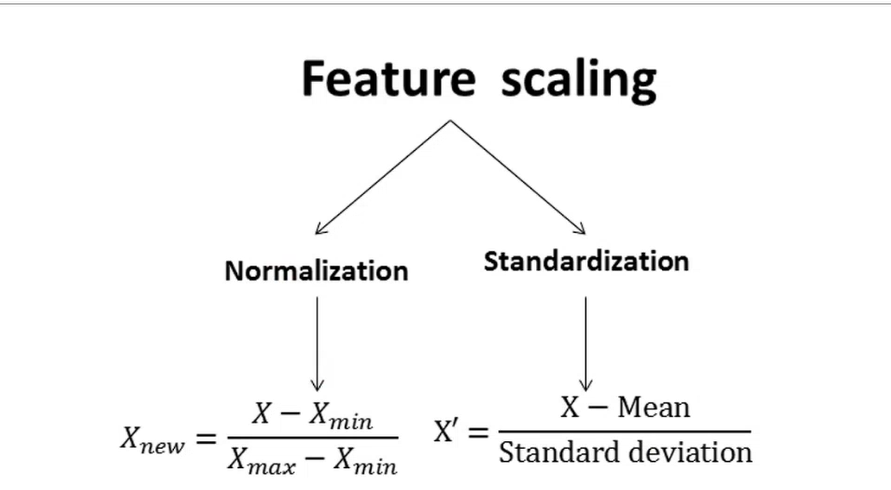
~~~
Scalling is important in case of continues features coz difference between the feature value is large
Types
        1. Normalization (values scalled to 0-1)
        2. Standerdization (values scalled to -3 to 3)
~~~

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_con = sc.fit_transform(X[con2])
X_con

array([[-0.48578741, -0.37572014, -0.28246529, ..., -0.61043588,
        -0.45219708, -1.03301503],
       [ 1.38801699,  1.49784409,  1.53140881, ..., -0.29850985,
         0.73809027,  0.3966429 ],
       [ 1.00865782,  0.99822696,  0.94805231, ..., -0.61043588,
         0.05792607,  0.03922842],
       ...,
       [ 0.66378585,  0.39452293,  0.16416702, ..., -0.9223619 ,
        -0.62223813,  0.3966429 ],
       [ 0.53733279,  0.33207079,  0.14593713, ..., -0.61043588,
         0.56804922,  0.03922842],
       [ 0.88220476,  0.7484184 ,  0.60168439, ..., -0.29850985,
         0.73809027,  0.3966429 ]])

In [53]:
con_cols =sc.get_feature_names_out()
con_cols

array(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room'], dtype=object)

In [54]:
X_con=pd.DataFrame(X_con,columns=con_cols)
X_con

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.452197,-1.033015
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.738090,0.396643
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.057926,0.039228
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.078172,1.111472
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.282156,-0.318186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.060445,0.019810,0.073018,-0.959938,-1.524806,-0.162577,-0.668585,-1.315292,1.180155,1.359872,1.852158,0.261346,1.629649,0.698038,-0.298510,2.098419,0.000000
89,0.054512,0.051036,0.045673,-0.244313,0.172352,-0.647181,-0.188665,0.875050,0.714407,0.562740,-0.083243,-0.220626,-0.139503,-0.632239,-1.234288,1.248213,0.039228
90,0.663786,0.394523,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,-1.050944,-1.666543,-1.024079,-0.898295,-0.922362,-0.622238,0.396643
91,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,-0.083243,0.467905,0.007926,-0.632239,-0.610436,0.568049,0.039228


In [55]:
X_con.mean()

Min.Price             9.908442e-17
Price                -1.719055e-16
Max.Price            -3.175477e-16
MPG.city             -2.709899e-16
MPG.highway          -1.790682e-18
EngineSize           -6.350953e-16
Horsepower            2.841216e-16
RPM                  -5.419798e-16
Rev.per.mile          3.792516e-16
Fuel.tank.capacity    1.313167e-16
Passengers            1.107239e-16
Length               -9.086220e-16
Wheelbase            -9.210076e-16
Width                 3.247104e-16
Turn.circle           1.083960e-15
Rear.seat.room        3.927563e-16
Luggage.room         -1.074409e-16
dtype: float64

In [56]:
X_con.std()

Min.Price             1.00542
Price                 1.00542
Max.Price             1.00542
MPG.city              1.00542
MPG.highway           1.00542
EngineSize            1.00542
Horsepower            1.00542
RPM                   1.00542
Rev.per.mile          1.00542
Fuel.tank.capacity    1.00542
Passengers            1.00542
Length                1.00542
Wheelbase             1.00542
Width                 1.00542
Turn.circle           1.00542
Rear.seat.room        1.00542
Luggage.room          1.00542
dtype: float64

### Combine catagorical and continues features

In [57]:
X_pre = X_con.join(X_cat)
X_pre

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.060445,0.019810,0.073018,-0.959938,-1.524806,-0.162577,-0.668585,-1.315292,1.180155,1.359872,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
89,0.054512,0.051036,0.045673,-0.244313,0.172352,-0.647181,-0.188665,0.875050,0.714407,0.562740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
90,0.663786,0.394523,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
X_pre.to_csv("CarsPreprocessed.csv",index=False)

#### Divide train and test data
80% Train data
10% Test Data

In [60]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=21)
xtrain.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
57,1.365026,1.289670,1.185041,-0.423219,-0.016221,-0.356418,-0.265452,-0.304365,0.187910,-0.663618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,-1.003095,-0.979424,-0.911397,0.113500,0.172352,-0.841022,-0.323043,2.054464,0.157535,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.606307,0.685966,0.729294,-0.781032,-0.959087,0.322027,1.116716,1.212025,-0.247462,0.716035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.043016,-0.021825,-0.063707,-0.423219,-0.204794,0.806631,1.347077,0.875050,-0.713210,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,1.985795,1.726835,1.449374,-0.781032,-0.581941,1.872759,1.270290,-1.146804,-0.996708,1.022624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
xtrain.shape  ## on this the model will be trained

(74, 256)

In [64]:
xtest.shape ## on this model will be tested

(19, 256)

### Create Model

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [68]:
model.score(xtrain,ytrain)

1.0

In [69]:
## R2 score
model.score(xtest,ytest)

0.9349876406889304

### Evaluate model on test data

In [72]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [74]:
ypred_tr[0:5]

array([[2920.],
       [2530.],
       [3730.],
       [3490.],
       [4055.]])

In [77]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [78]:
ypred_ts[0:5]

array([[2554.28150072],
       [3606.82724487],
       [3031.13595567],
       [3332.5965342 ],
       [3952.97072082]])

In [79]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910
